# Práctica de NLP con Python y Google Colab para n-gramas

## **Objetivo**
Analizar el texto de un libro y generar n-gramas para entender la estructura del lenguaje.

## **Requisitos**
- Cuenta de Google Colab.
- Conocimientos básicos de Python y NLP.
- Librerías necesarias: `nltk`, `pandas`, `matplotlib`, `requests`.

## **Descripción**
El script analiza el libro *Alicia en el país de las maravillas* (disponible en el Proyecto Gutenberg). Se tokeniza el texto y se generan n-gramas de diferentes longitudes para estudiar su frecuencia y distribución. Además, se grafican los resultados para visualización.

## **Secciones del Código**

### **1. Importar Librerías**
```python
import nltk
from nltk.util import ngrams
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [6]:
# Importar librerías necesarias
import nltk
from nltk.util import ngrams
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import requests

## **2. Descargar Recursos de NLTK**



In [7]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **3. Cargar el Texto del Libro**


In [8]:
# URL del libro desde el Proyecto Gutenberg
url = "https://www.gutenberg.org/files/11/11-0.txt"

# Descargar el contenido del libro
response = requests.get(url)
texto_libro = response.text

# Cargar el texto en un DataFrame (simulando el formato inicial)
texto = pd.DataFrame([texto_libro], columns=["texto"])

## **4. Tokenizar el Texto**

In [9]:
# Tokenizar el texto
tokens = nltk.word_tokenize(texto["texto"].iloc[0])

## **5. Generar N-gramas de Longitud 2 (Bigramas)**

In [10]:
# Generar n-gramas de longitud 2 (bigramas)
bigramas = list(ngrams(tokens, 2))
print("Bigramas (n=2):", bigramas[:10])

Bigramas (n=2): [('*', '*'), ('*', '*'), ('*', 'START'), ('START', 'OF'), ('OF', 'THE'), ('THE', 'PROJECT'), ('PROJECT', 'GUTENBERG'), ('GUTENBERG', 'EBOOK'), ('EBOOK', '11'), ('11', '*')]


## **6. Generar N-gramas de Longitud 3**

In [11]:
# Generar n-gramas de longitud 3
ngramas_3 = list(ngrams(tokens, 3))
print("N-gramas (n=3):", ngramas_3[:10])

N-gramas (n=3): [('*', '*', '*'), ('*', '*', 'START'), ('*', 'START', 'OF'), ('START', 'OF', 'THE'), ('OF', 'THE', 'PROJECT'), ('THE', 'PROJECT', 'GUTENBERG'), ('PROJECT', 'GUTENBERG', 'EBOOK'), ('GUTENBERG', 'EBOOK', '11'), ('EBOOK', '11', '*'), ('11', '*', '*')]


## **7. Generar N-gramas de Longitud 4**

In [13]:
# Generar n-gramas de longitud 4
ngramas_4 = list(ngrams(tokens, 4))
print("N-gramas (n=4):", ngramas_4[:10])

# Generar n-gramas de longitud 5
ngramas_5 = list(ngrams(tokens, 5))
print("N-gramas (n=5):", ngramas_5[:10])

N-gramas (n=4): [('*', '*', '*', 'START'), ('*', '*', 'START', 'OF'), ('*', 'START', 'OF', 'THE'), ('START', 'OF', 'THE', 'PROJECT'), ('OF', 'THE', 'PROJECT', 'GUTENBERG'), ('THE', 'PROJECT', 'GUTENBERG', 'EBOOK'), ('PROJECT', 'GUTENBERG', 'EBOOK', '11'), ('GUTENBERG', 'EBOOK', '11', '*'), ('EBOOK', '11', '*', '*'), ('11', '*', '*', '*')]
N-gramas (n=5): [('*', '*', '*', 'START', 'OF'), ('*', '*', 'START', 'OF', 'THE'), ('*', 'START', 'OF', 'THE', 'PROJECT'), ('START', 'OF', 'THE', 'PROJECT', 'GUTENBERG'), ('OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK'), ('THE', 'PROJECT', 'GUTENBERG', 'EBOOK', '11'), ('PROJECT', 'GUTENBERG', 'EBOOK', '11', '*'), ('GUTENBERG', 'EBOOK', '11', '*', '*'), ('EBOOK', '11', '*', '*', '*'), ('11', '*', '*', '*', '[')]


## **8. Gráfica de Frecuencia de N-gramas Más Frecuentes**

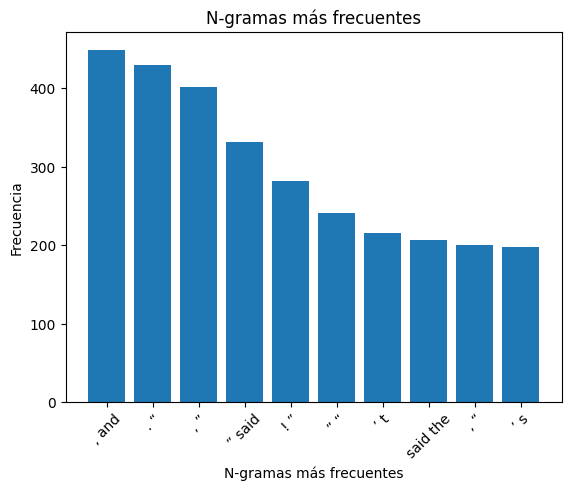

In [14]:
# Calcular la frecuencia de los bigramas
freq_ngramas = FreqDist(bigramas)

# Gráfica de los 10 n-gramas más frecuentes
ngramas_mas_frecuentes = freq_ngramas.most_common(10)
plt.bar([" ".join(ngrama[0]) for ngrama in ngramas_mas_frecuentes],
        [ngrama[1] for ngrama in ngramas_mas_frecuentes])
plt.xlabel("N-gramas más frecuentes")
plt.ylabel("Frecuencia")
plt.title("N-gramas más frecuentes")
plt.xticks(rotation=45)
plt.show()

## **9. Gráfica de Distribución de Frecuencias de N-gramas**

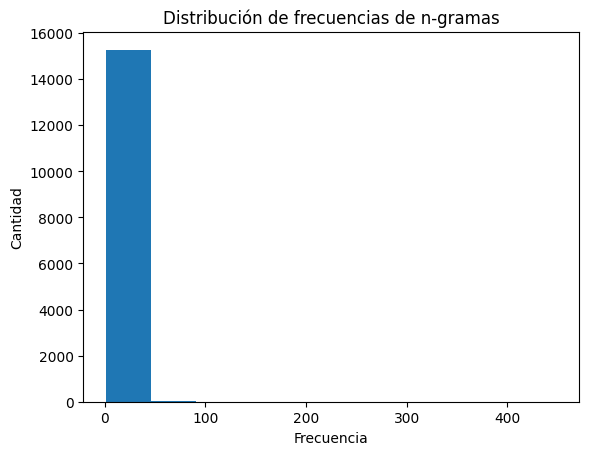

In [15]:
# Gráfica de distribución de frecuencias
plt.hist(freq_ngramas.values(), bins=10)
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.title("Distribución de frecuencias de n-gramas")
plt.show()

## **10. Gráfica de N-gramas Más Frecuentes**


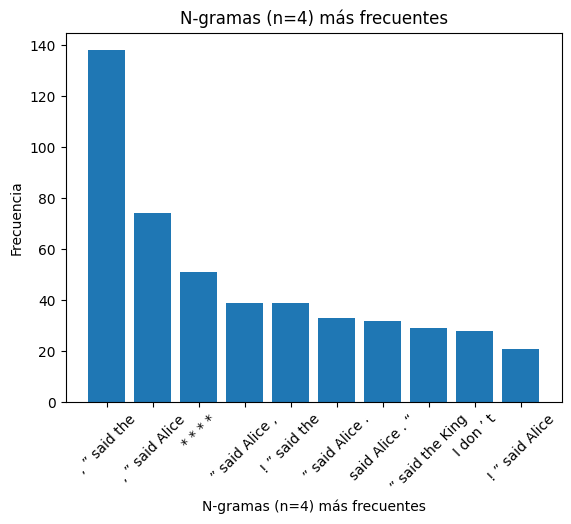

In [19]:
# Calcular la frecuencia de los n-gramas de longitud 4
freq_ngramas_4 = FreqDist(ngramas_4)

# Gráfica de los 10 n-gramas de longitud 4 más frecuentes
ngramas_4_mas_frecuentes = freq_ngramas_4.most_common(10)
plt.bar([" ".join(n[0]) for n in ngramas_4_mas_frecuentes],
        [n[1] for n in ngramas_4_mas_frecuentes])
plt.xlabel("N-gramas (n=4) más frecuentes")
plt.ylabel("Frecuencia")
plt.title("N-gramas (n=4) más frecuentes")
plt.xticks(rotation=45)
plt.show()

## **11. Gráfica de Distribución de Frecuencias de N-gramas**

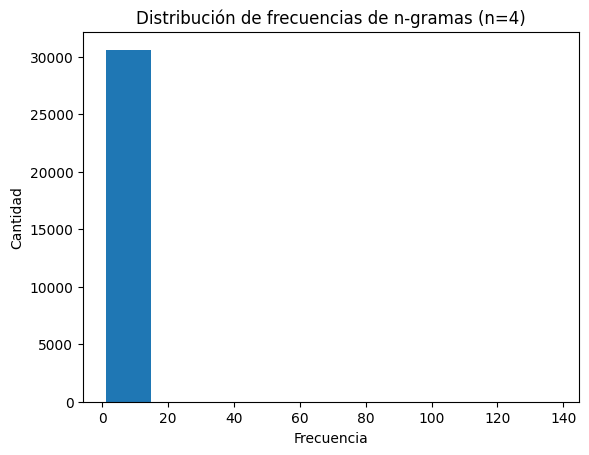

In [23]:
# Gráfica de distribución de frecuencias para n-gramas de longitud 4
plt.hist(freq_ngramas_4.values(), bins=10)
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.title("Distribución de frecuencias de n-gramas (n=4)")
plt.show()
